Training a Model to predict the accidents severity 

In [1]:
import datetime as dt
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import log_loss

In [3]:
# import accident data (numeric values)
accidents = pd.read_csv('accidents_Cleaned.csv')

Step1: Data Normalization

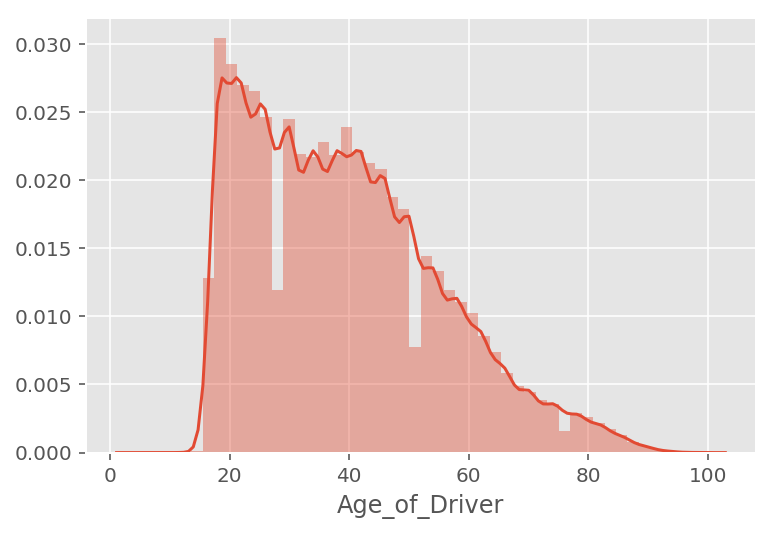

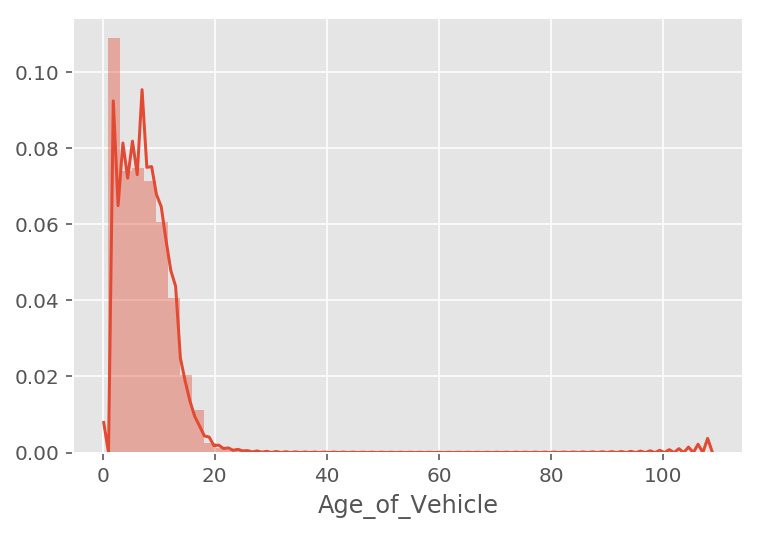

<Figure size 432x288 with 0 Axes>

In [4]:
# standarize the age data, so it won't skew the machine learning algorithm
sns.distplot(accidents['Age_of_Driver']);
fig = plt.figure()
sns.distplot(accidents['Age_of_Vehicle']);
fig = plt.figure()

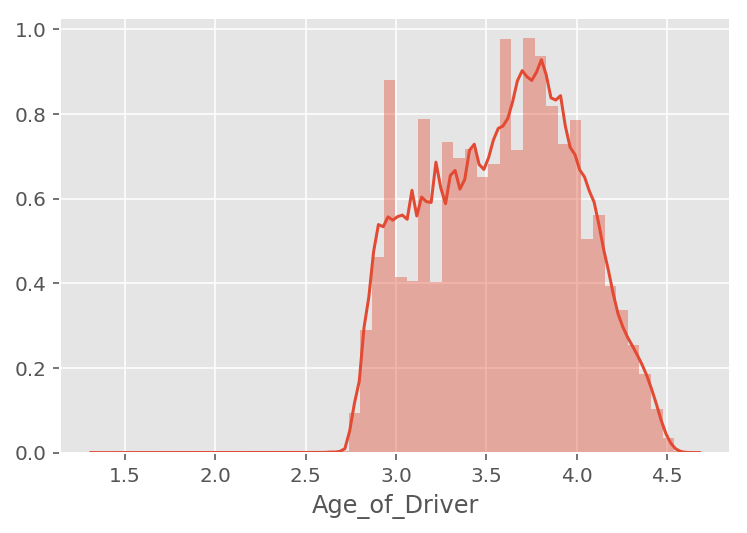

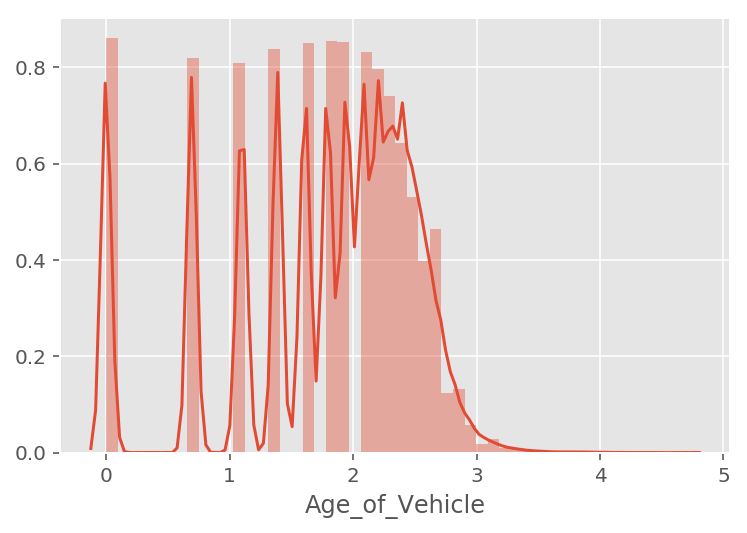

<Figure size 432x288 with 0 Axes>

In [5]:
# normalization
accidents['Age_of_Driver'] = np.log(accidents['Age_of_Driver'])
accidents['Age_of_Vehicle'] = np.log(accidents['Age_of_Vehicle'])
sns.distplot(accidents['Age_of_Driver']);
fig = plt.figure()
sns.distplot(accidents['Age_of_Vehicle']);
fig = plt.figure()

Step2: Data Splitting 

Split the data into training set and test set, for simplification there will be no validation set.

In [6]:
accident_ml = accidents.drop('Accident_Severity' ,axis=1)
accident_ml = accident_ml[['Did_Police_Officer_Attend_Scene_of_Accident', 'Age_of_Driver' ,'Vehicle_Type', 
                           'Age_of_Vehicle','Engine_Capacity_(CC)', 'Day_of_Week', 'Weather_Conditions', 
                           'Road_Surface_Conditions', 'Light_Conditions', 'Sex_of_Driver' ,'Speed_limit']]

# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(accident_ml.values, 
                                              accidents['Accident_Severity'].values,test_size=0.20, random_state=99)

Step3: Training - Model I 'Logistic Regression'
Parameter Tuning is left out, since it took too much time.

In [11]:
lr = LogisticRegression()
# Fit the model on the trainng data.
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=y_pred)
print("Accuracy", round(accuracy_score(y_pred, y_test)*100,2))
print(sk_report)
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 86.23
             precision    recall  f1-score   support

        1.0   0.000000  0.000000  0.000000      4038
        2.0   0.000000  0.000000  0.000000     38705
        3.0   0.862322  0.999989  0.926067    267716

avg / total   0.743600  0.862314  0.798569    310459



Predicted,1.0,3.0,All
Actual,,,
1.0,0,4038,4038
2.0,0,38705,38705
3.0,3,267713,267716
All,3,310456,310459


Step3: Training - Model II 'Random Forest'
Parameter Tuning is left out, since it took too much time.

In [7]:
random_forest = RandomForestClassifier(n_estimators=200)
random_forest.fit(X_train,y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_test, y_test)
acc_random_forest1 = round(random_forest.score(X_test, y_test) * 100, 2)

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy" , acc_random_forest1)
print(sk_report)
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 84.6
             precision    recall  f1-score   support

        1.0   0.058315  0.006686  0.011997      4038
        2.0   0.236383  0.058752  0.094113     38705
        3.0   0.866737  0.972475  0.916566    267716

avg / total   0.777636  0.845999  0.802266    310459



Predicted,1.0,2.0,3.0,All
Actual,,,,
1.0,27,313,3698,4038
2.0,100,2274,36331,38705
3.0,336,7033,260347,267716
All,463,9620,300376,310459


Step4: Feature importance
Sklearn's random forest library to find out the most important features. 

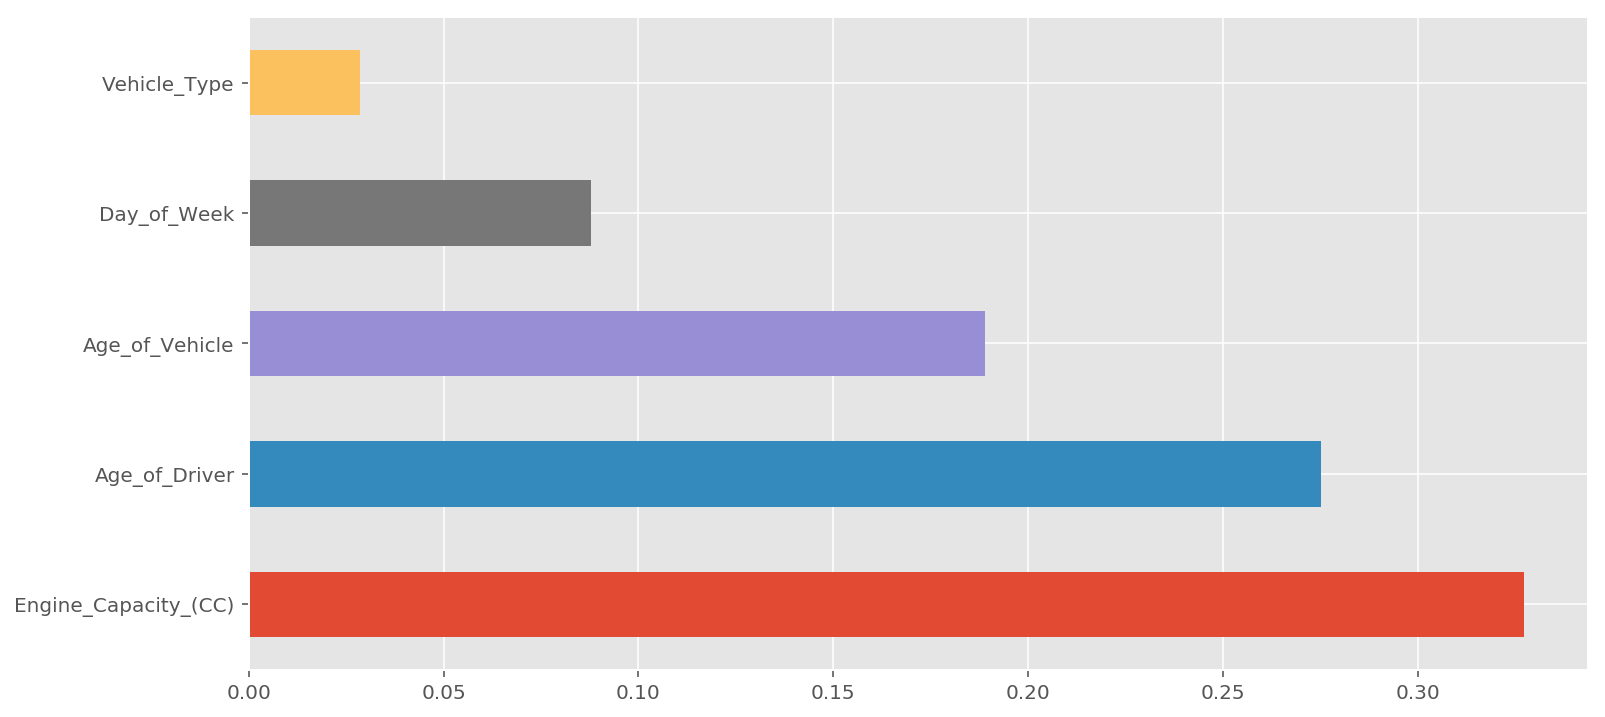

In [8]:
plt.figure(figsize=(12,6))
feat_importances = pd.Series(random_forest.feature_importances_, index=accident_ml.columns)
feat_importances.nlargest(5).plot(kind='barh')